# Pymaceuticals Inc.
---

### Analysis

- Ketraphil treatment has the highest Tumor Volume on average with mean of 55.23 and median of 53.69.
- Most number of mice were treated with Capomulin and Ramicane treatments.
- The distribution of male and female mice are very similar with 51% of it being male and 49% being female
- One of the mouse treated with Infubinol lies beyound the limit and is an outlier.
- The Tumor Volume of Mouse l509 treated with Capomulin rised during the initial days, started falling around day 20, had a slight increase around 25. The volume of tumor fluctuated with time but as time goes on, it has decreased drastically.
- There is a strong positive relation with average tumor volume and weight of mice. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
test = pd.merge(mouse_metadata, study_results, how = 'inner', on ="Mouse ID" )

# Display the data table for preview
test.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
test["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
test.loc[test.duplicated(subset= ['Mouse ID', 'Timepoint']),'Mouse ID'].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup = test.loc[test["Mouse ID"]== 'g989']
dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= test[test["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
index_df = clean_df.set_index(["Drug Regimen"])
grouped_df = index_df.groupby(["Drug Regimen"])
tumor = grouped_df["Tumor Volume (mm3)"]
mean_tumor = tumor.mean()
median_tumor = tumor.median()
var_tumor = tumor.var()
std_tumor = tumor.std()
std_error_tumor = tumor.sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary = pd.DataFrame({"Mean Tumor Volume" : mean_tumor, "Median Tumor Volume" : median_tumor, "Tumor Volume Variance": var_tumor,
                                "Tumor Volume Std. Dev" : std_tumor, "Tumor Volume Std. Err" : std_error_tumor})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

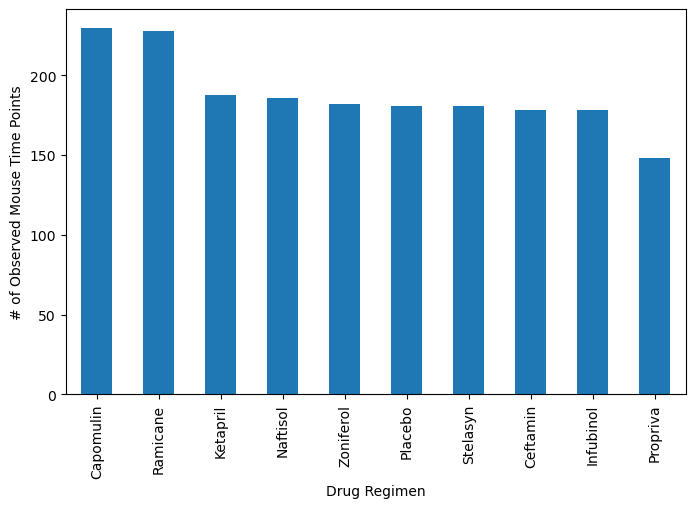

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
group= clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()
sort = group.sort_values(ascending = False)

sort.plot(kind = "bar", figsize = (8,5), xlabel ="Drug Regimen", ylabel = "# of Observed Mouse Time Points")

plt.show()

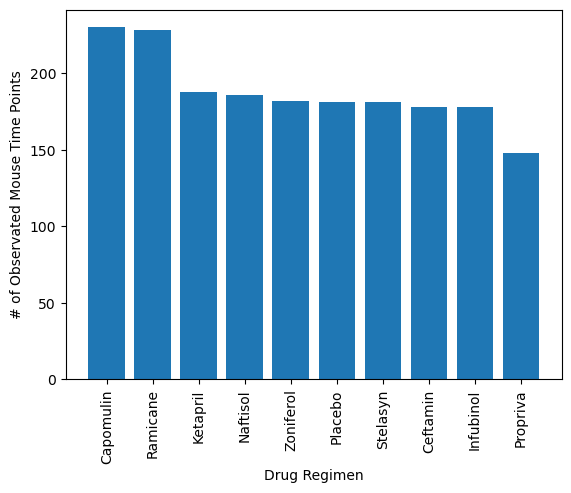

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(sort))
plt.bar(x_axis, sort, align = "center")
tlocation = [sort for sort in x_axis]
plt.xticks(tlocation,["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Placebo","Stelasyn","Ceftamin","Infubinol","Propriva"],rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observated Mouse Time Points")
plt.show()

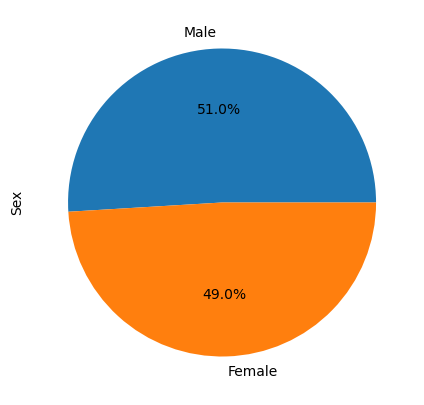

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
group= clean_df.groupby(["Sex"])["Mouse ID"].count()
sort = group.sort_values(ascending = False)
sort.plot(kind = "pie", figsize =(8,5), ylabel = "Sex", autopct ="%1.1f%%")
plt.show()

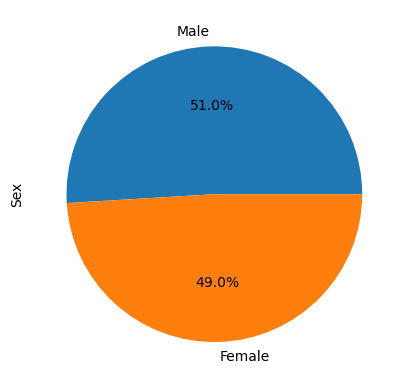

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sort,labels = ["Male","Female"], autopct ="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
f_tumor = clean_df.groupby(["Mouse ID"]).max("Timepoint")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df,f_tumor, on= ["Mouse ID","Timepoint"], how = "right")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,a203,Infubinol,Female,20,23,45,67.973419,2,20,23,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1,21,25,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4,17,29,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3,20,28,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1,16,29,63.440686,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tvol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)_x"]
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr) 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    tvol_data.append(tumor_vol)
   
    # Determine outliers using upper and lower bounds
    outlier = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

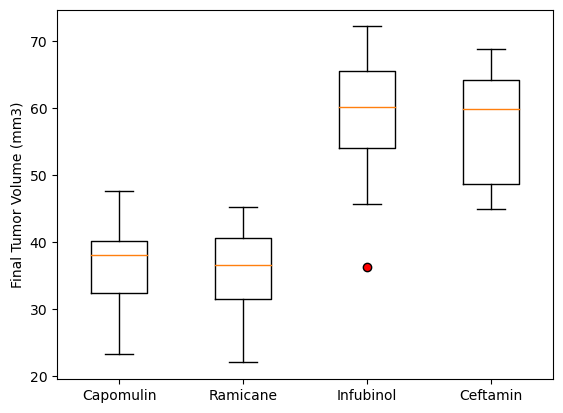

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
out= dict(markerfacecolor = "red",marker ="o" )
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tvol_data, labels = treatment, flierprops = out)
plt.show()

## Line and Scatter Plots

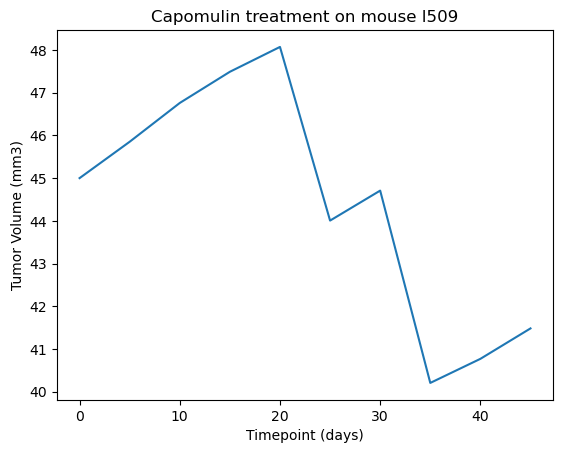

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
data = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"]== "l509")]
x = data["Timepoint"]
y = data["Tumor Volume (mm3)"] 

plt.plot(x,y)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment on mouse l509")
plt.show()

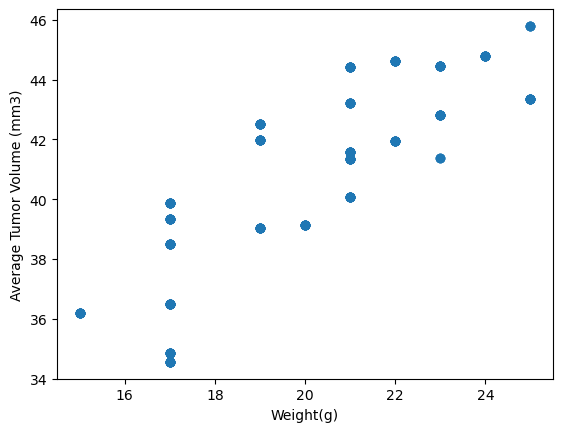

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
new = data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
merged = pd.merge(data,new, on = "Mouse ID", how = "left")
merge =merged.rename(columns ={"Tumor Volume (mm3)_y" : "Average volume"})
x = merge["Weight (g)"]
y = merge["Average volume"]
plt.scatter(x,y)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.834


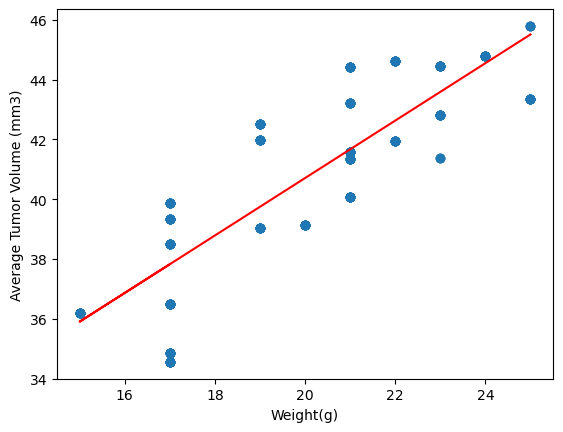

In [19]:
from scipy.stats import linregress
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = st.pearsonr(x,y)
print(f"The correlation between mouse weight and the average tumor volume is {round(corr[0],3)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()